<a href="https://colab.research.google.com/github/zilavalencia/ChungaraVZila-IA-SIS420/blob/main/Parciales/1er%20%20Parcial/zila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen 1er parcial

Nombre: Chungara Valencia Zila

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import os
import numpy as np

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [3]:
#dataset cargado para ver las ventas de videojuegos y calificacaciones
import numpy as np
from sklearn.model_selection import train_test_split

# Cargar el dataset
data = np.loadtxt('/content/drive/MyDrive/dataset_10.csv', delimiter=';')

# Separar en características (X) y etiquetas (y)
X = data[:, :6]   # Las primeras 6 columnas
y = data[:, 6]    # La columna 7 es la variable objetivo

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir los tamaños para verificar
print("Tamaño de entrenamiento (X):", X_train.shape)
print("Tamaño de prueba (X):", X_test.shape)


Tamaño de entrenamiento (X): (13278, 6)
Tamaño de prueba (X): (3320, 6)


In [4]:
def normalizarCaracteristicas(X):
    """
    Normaliza las características de X usando la media y desviación estándar por columna.
    Devuelve: X normalizado, la media (mu) y desviación estándar (sigma) para revertir o aplicar a otros datos.
    """
    mu = np.mean(X, axis=0)          # Media de cada característica
    sigma = np.std(X, axis=0)        # Desviación estándar de cada característica

    # Evita división por cero
    sigma[sigma == 0] = 1

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma



In [5]:
X_train_norm, mu, sigma = normalizarCaracteristicas(X_train)
X_test_norm = (X_test - mu) / sigma  # Usamos mu y sigma del entrenamiento

# Agregar columna de unos para el bias
X_train_ready = np.concatenate([np.ones((X_train_norm.shape[0], 1)), X_train_norm], axis=1)
X_test_ready = np.concatenate([np.ones((X_test_norm.shape[0], 1)), X_test_norm], axis=1)


In [6]:
print(X_train_ready)

[[ 1.          1.2484237   0.00514962 ... -0.3227022  -0.25131623
  -0.27258791]
 [ 1.          1.07150153  0.30308737 ... -0.3227022  -0.25131623
  -0.27258791]
 [ 1.         -0.33116406  1.34586948 ... -0.3227022   0.55850383
  -0.27258791]
 ...
 [ 1.         -0.60915483  0.74999399 ...  0.06080335 -0.25131623
  -0.0419229 ]
 [ 1.         -1.55315649 -0.59072587 ...  1.82041702 -0.25131623
   1.34206711]
 [ 1.          1.55933991  0.00514962 ... -0.30014305 -0.25131623
  -0.27258791]]


In [7]:
# usare la funcion del costo con el metodo Mean Squared Error
# para ver cuan serca estan mis predicciones de regresion
# con las y realeas en este caso Y= ventas globales
def calcularCosto(X, y, theta):

    m = y.size

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J




In [8]:
def calcularDescensoGradiente(X, y, theta, alpha, num_iters):
    """
    Aplica descenso de gradiente para minimizar el costo J.

    X: matriz de características (ya normalizada y con columna de unos añadida)
    y: vector de etiquetas (valores reales)
    theta: parámetros iniciales
    alpha: tasa de aprendizaje
    num_iters: número de iteraciones

    Retorna:
        - theta final ajustado
        - historial de costo por iteración
    """
    m = len(y)
    J_historico = []

    for i in range(num_iters):
        predicciones = X.dot(theta)          # h(x)
        error = predicciones - y
        gradiente = (1 / m) * X.T.dot(error) # ∇J(theta)
        theta = theta - alpha * gradiente    # actualización

        costo = calcularCosto(X, y, theta)
        J_historico.append(costo)

    return theta, J_historico



Theta final: [ 5.28681799e-01 -5.55643567e-04 -7.14760654e-04  7.43238200e-01
  4.45078482e-01  3.11300961e-01  1.77536681e-01]
Costo final: 3.1168100839828746e-05


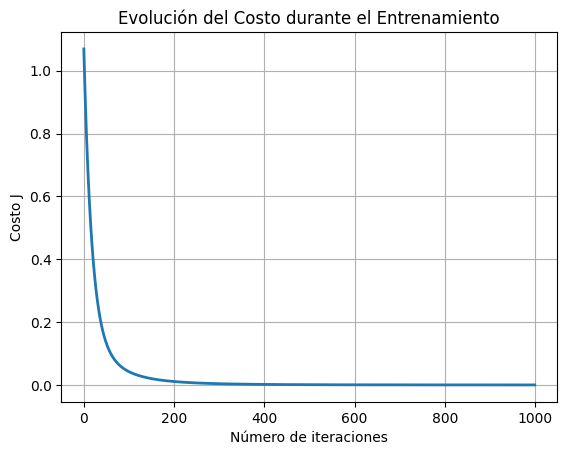

In [9]:
# calculamos las mejores parametros de theta
import matplotlib.pyplot as pyplot
import numpy as np

# Aquí ya has calculado tu descenso de gradiente
theta = np.zeros(X_train_ready.shape[1])
alpha = 0.01
num_iters = 1000

# Aplicar descenso de gradiente
theta_final, J_historial = calcularDescensoGradiente(X_train_ready, y_train, theta, alpha, num_iters)

# Mostrar los resultados
print("Theta final:", theta_final)
print("Costo final:", J_historial[-1])

# Graficar la evolución del costo durante el entrenamiento
pyplot.plot(np.arange(len(J_historial)), J_historial, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Evolución del Costo durante el Entrenamiento')
pyplot.grid(True)  # Añadir una cuadrícula para facilitar la visualización
pyplot.show()  # Mostrar la gráfica


In [10]:
#  ejemplo
y_pred = np.dot([1,4, 2009,15.75,11.01,3.28,2.96], theta)
print(y_pred)

0.0


In [11]:
# Realizar las predicciones para el conjunto de entrenamiento y prueba
y_train_pred = np.dot(X_train_ready, theta_final)  # Predicción para el conjunto de entrenamiento
y_test_pred = np.dot(X_test_ready, theta_final)  # Predicción para el conjunto de prueba

# Calcular el error absoluto en ambos conjuntos
error_train = np.mean(np.abs(y_train_pred - y_train))  # Error medio absoluto en el entrenamiento
error_test = np.mean(np.abs(y_test_pred - y_test))  # Error medio absoluto en la prueba

# Calcular el porcentaje de error (porcentaje de diferencia respecto al valor real)
porcentaje_error_train = (error_train / np.mean(y_train)) * 100
porcentaje_error_test = (error_test / np.mean(y_test)) * 100

# Imprimir los resultados
print(f"Porcentaje de error en el conjunto de entrenamiento: {porcentaje_error_train:.2f}%")
print(f"Porcentaje de error en el conjunto de prueba: {porcentaje_error_test:.2f}%")



Porcentaje de error en el conjunto de entrenamiento: 0.82%
Porcentaje de error en el conjunto de prueba: 0.77%


In [12]:
def evaluar_predicciones_regresion(theta, X, y, tolerancia=0.1):
    """
    Evalúa las predicciones del modelo de regresión con una tolerancia para determinar si son correctas o incorrectas.

    theta: parámetros del modelo (ajustados con descenso de gradiente)
    X: características (matriz de entrada)
    y: etiquetas reales (valores verdaderos)
    tolerancia: umbral para considerar una predicción como correcta (por defecto 0.1)

    Retorna: precisión (en %), número de correctas e incorrectas.
    """
    # Predicciones del modelo
    y_pred = np.dot(X, theta)

    # Calcular la diferencia absoluta entre las predicciones y las etiquetas reales
    diferencia = np.abs(y_pred - y)

    # Calcular cuántas predicciones están dentro de la tolerancia
    correctas = np.sum(diferencia <= tolerancia)
    incorrectas = np.sum(diferencia > tolerancia)

    # Calcular la precisión (porcentaje de predicciones correctas)
    precision = (correctas / len(y)) * 100

    return precision, correctas, incorrectas

# Evaluar las predicciones en el conjunto de prueba
precision_test, correctas_test, incorrectas_test = evaluar_predicciones_regresion(theta_final, X_test_ready, y_test)

# Calcular el porcentaje de predicciones incorrectas
incorrectas_porcentaje_test = 100 - precision_test

# Imprimir los resultados
print(f"Precisión de las predicciones en el conjunto de prueba: {precision_test:.2f}%")
print(f"Porcentaje de predicciones incorrectas en el conjunto de prueba: {incorrectas_porcentaje_test:.2f}%")
print(f"Número de predicciones correctas en el conjunto de prueba: {correctas_test}")
print(f"Número de predicciones incorrectas en el conjunto de prueba: {incorrectas_test}")




Precisión de las predicciones en el conjunto de prueba: 99.91%
Porcentaje de predicciones incorrectas en el conjunto de prueba: 0.09%
Número de predicciones correctas en el conjunto de prueba: 3317
Número de predicciones incorrectas en el conjunto de prueba: 3
